<a href="https://colab.research.google.com/github/navanil018/Placement_Prediction_Classifier/blob/master/Placement_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# plotly library
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [29]:
#Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
#drive.mount('/content/drive')

#!ls "/content/drive/"
loc = "/content/sample_data/Placement_Data.csv"

data = pd.read_csv(loc)
data.head()

,Roll_No,HS,UG,BOARD,COMMUNICATION,INTERNSHIP,PLACED
0,130001,A,C,MATRIC,GOOD,N,N
1,130002,A,B,STATE,AVERAGE,N,Y
2,130003,B,B,MATRIC,AVERAGE,N,Y
3,130004,B,C,MATRIC,GOOD,N,Y
4,130005,C,C,STATE,GOOD,Y,Y


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 7 columns):
Roll_No          999 non-null int64
HS               999 non-null object
UG               999 non-null object
BOARD            999 non-null object
COMMUNICATION    999 non-null object
INTERNSHIP       999 non-null object
PLACED           999 non-null object
dtypes: int64(1), object(6)
memory usage: 54.7+ KB


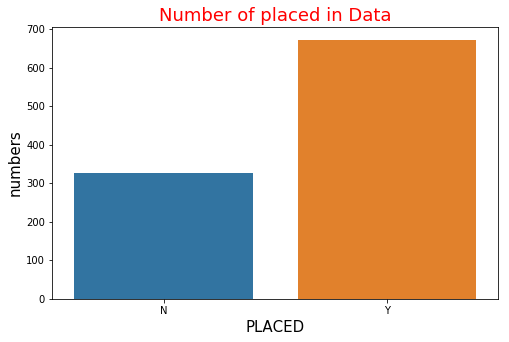

Y    672
N    327
Name: PLACED, dtype: int64

In [31]:
plt.subplots(figsize=(8,5))
sns.countplot(data.PLACED)
plt.xlabel("PLACED",fontsize="15")
plt.ylabel("numbers",fontsize="15")
plt.title("Number of placed in Data", color="red",fontsize="18")
plt.show()

data.PLACED.value_counts()

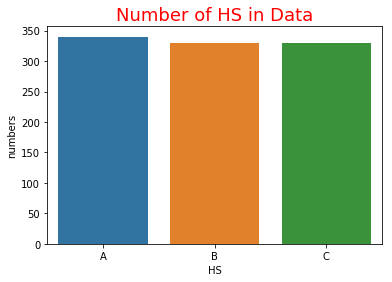

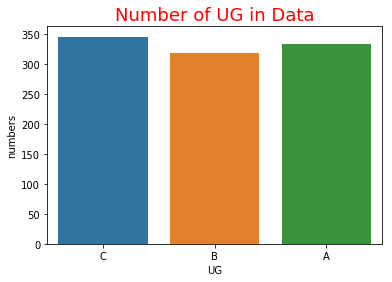

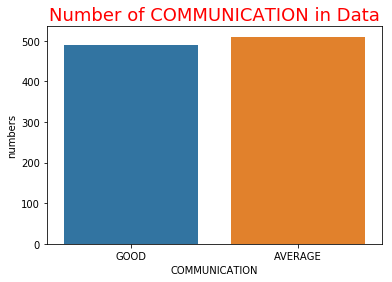

In [47]:
sns.countplot(data.HS)
plt.xlabel("HS")
plt.ylabel("numbers")
plt.title("Number of HS in Data", color="red",fontsize="18")
plt.show()

sns.countplot(data.UG)
plt.xlabel("UG")
plt.ylabel("numbers")
plt.title("Number of UG in Data", color="red",fontsize="18")
plt.show()

sns.countplot(data.COMMUNICATION)
plt.xlabel("COMMUNICATION")
plt.ylabel("numbers")
plt.title("Number of COMMUNICATION in Data", color="red",fontsize="18")
plt.show()

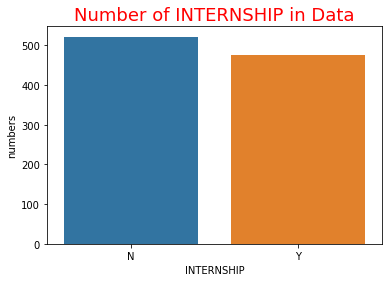

In [49]:
sns.countplot(data.INTERNSHIP)
plt.xlabel("INTERNSHIP")
plt.ylabel("numbers")
plt.title("Number of INTERNSHIP in Data", color="red",fontsize="18")
plt.show()

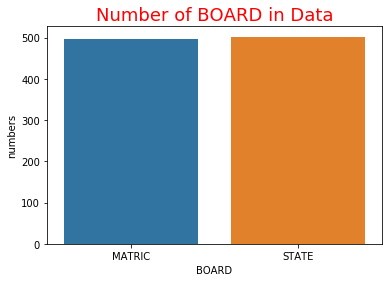

In [50]:
sns.countplot(data.BOARD)
plt.xlabel("BOARD")
plt.ylabel("numbers")
plt.title("Number of BOARD in Data", color="red",fontsize="18")
plt.show()

In [54]:
X=data.drop('PLACED',axis=1) #Predictors
y=data['PLACED'] #Response
X.head()

,Roll_No,HS,UG,BOARD,COMMUNICATION,INTERNSHIP
0,130001,A,C,MATRIC,GOOD,N
1,130002,A,B,STATE,AVERAGE,N
2,130003,B,B,MATRIC,AVERAGE,N
3,130004,B,C,MATRIC,GOOD,N
4,130005,C,C,STATE,GOOD,Y


In [60]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

X.head()
y

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,

No = 0
Yes = 1

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
from sklearn.tree import DecisionTreeClassifier as DT

classifier = DT(criterion='entropy',random_state=42)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [0]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [0]:
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

In [72]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.6650

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.23      0.29        61
           1       0.72      0.86      0.78       139

    accuracy                           0.67       200
   macro avg       0.56      0.54      0.54       200
weighted avg       0.62      0.67      0.63       200


Confusion Matrix:
[[ 14  47]
 [ 20 119]]



In [73]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [74]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       533

    accuracy                           1.00       799
   macro avg       1.00      1.00      1.00       799
weighted avg       1.00      1.00      1.00       799


Confusion Matrix:
[[266   0]
 [  0 533]]

Average Accuracy:	0.6560

Standard Deviation:	0.0240


In [75]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.6850

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.15      0.22        61
           1       0.71      0.92      0.80       139

    accuracy                           0.69       200
   macro avg       0.58      0.53      0.51       200
weighted avg       0.63      0.69      0.63       200


Confusion Matrix:
[[  9  52]
 [ 11 128]]

